## Data Fitting, Covariance, and Confidence Levels

In [3]:
'''
model_covariance_confidence
Author: Marisa Tania
'''
from IPython.display import IFrame
IFrame('http://www.usablestats.com/lessons/normal', width=700, height=350)
from scipy.optimize import curve_fit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': '{:.3f}'.format})
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D 

### Part I

In [4]:
def yTrue(x, k, phi):
    '''
    This function is the model sin(kx+phi)
    '''
    return np.sin(k * x + phi)

# Given data
err_floor = 0.1
k = 2
phi = np.pi/6
N = 101
x_arr = np.linspace(0, 2 * np.pi, N)
y_true = yTrue(x_arr, k, phi)
meas_err = 0.2 * y_true

# specify error to simulate noisy data
var = meas_err ** 2 + err_floor ** 2
total_err = np.sqrt(var)
y_noise = total_err * np.random.randn(x_arr.shape[0])

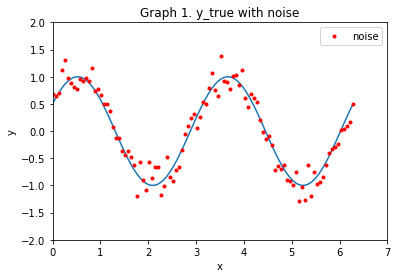

In [5]:
# Generate noise
y_data = yTrue(x_arr, k, phi)
y = y_data + y_noise

plt.plot(x_arr, y_data)
plt.plot(x_arr, y, 'r.', label = 'noise')
plt.legend()
plt.title("Graph 1. y_true with noise")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.show()

In [6]:
# Determine best fit 
popt, pcov = curve_fit(yTrue, x_arr, y, p0=[k, phi], maxfev=10000)
y_best_fit = yTrue(x_arr, *popt)
chi2 = ((y - y_best_fit) ** 2 / var).sum()
print('The chi^2 is: {:.4f}'.format(chi2))

# the reduced chi2
n = 2 # number of fitting parameters
DOF = N - n
chi2_nu = chi2 / DOF
print('The reduced chi^2 is: {:.4f}'.format(chi2_nu))

The chi^2 is: 117.5030
The reduced chi^2 is: 1.1869


Best-fit for k and phi:
[1.988 0.561]
chi2, chi2_nu, DOF are: 117.503, 1.187, 99.000, respectively.


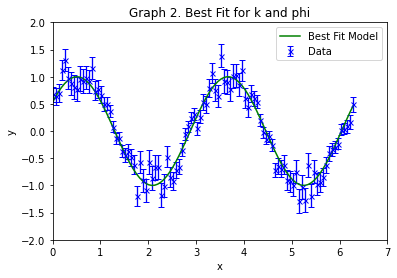

In [7]:
# Display sin result
print('Best-fit for k and phi:')
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print(popt)
print('chi2, chi2_nu, DOF are: {:.3f}, {:.3f}, {:.3f}, respectively.'.format(chi2, chi2_nu, DOF))

# Plot best fit k and phi
plt.errorbar(x_arr, y, yerr=total_err, fmt='xb', ms=5, capsize=3, elinewidth=1.3, label='Data')
plt.plot(x_arr, y_best_fit, 'g-', label='Best Fit Model')
plt.legend()
plt.title('Graph 2. Best Fit for k and phi')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.show()

### The best-fit parameters, the covariance matrix, and the uncertainties for k and φ

In [8]:
print("Best-fit coefficients:\n{}\n".format(popt))
print("The covariance matrix:\n{}\n".format(pcov))

k_best = popt[0]
phi_best = popt[1]
print('Best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_best, phi_best))

# The diagonal elements of the covariance matrix are the variances of the two fitting parameters.
k_cov = np.sqrt(pcov[0, 0])
phi_cov = np.sqrt(pcov[1, 1])
print('1 sigma error on best-fit k and phi, \
respectively: {:.3f} {:.3f}\n'.format(k_cov, phi_cov))

print("The best parameters are:")
print("k = {:.3f} +/ {:.3f}.".format(k_best, k_cov))
print("phi = {:.3f} +/ {:.3f}.".format(phi_best, phi_cov))

Best-fit coefficients:
[1.988 0.561]

The covariance matrix:
[[0.000 -0.001]
 [-0.001 0.003]]

Best-fit k and phi, respectively: 1.988 0.561
1 sigma error on best-fit k and phi, respectively: 0.014 0.054

The best parameters are:
k = 1.988 +/ 0.014.
phi = 0.561 +/ 0.054.


### Q: How confident are you that the “phase” φ is not zero? 
### A: 99.99994% confidence (5-sigma)

In [9]:
print("1 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(phi_best, phi_cov, phi_best + phi_cov,\
                                                                                phi_best, phi_cov, phi_best - phi_cov))
print("2 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(phi_best, 2 * phi_cov, phi_best + 2 * phi_cov,\
                                                                                phi_best, 2 * phi_cov, phi_best - 2 * phi_cov))
print("3 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(phi_best, 3 * phi_cov, phi_best + 3 * phi_cov,\
                                                                                phi_best, 3 * phi_cov, phi_best - 3 * phi_cov))
print("4 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(phi_best, 4 * phi_cov, phi_best + 3 * phi_cov,\
                                                                                phi_best, 4 * phi_cov, phi_best - 4 * phi_cov))
print("5 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(phi_best, 5 * phi_cov, phi_best + 5 * phi_cov,\
                                                                                phi_best, 5 * phi_cov, phi_best - 5 * phi_cov))

1 sigma: 0.561 + 0.054 = 0.615, 0.561 - 0.054 = 0.507
2 sigma: 0.561 + 0.108 = 0.669, 0.561 - 0.108 = 0.454
3 sigma: 0.561 + 0.162 = 0.723, 0.561 - 0.162 = 0.400
4 sigma: 0.561 + 0.216 = 0.723, 0.561 - 0.216 = 0.346
5 sigma: 0.561 + 0.269 = 0.831, 0.561 - 0.269 = 0.292


### PDF for k and φ, in 2-d (“heat maps”) and 3-d

check before plotting:  (523, 523) (523, 523) (523, 523)


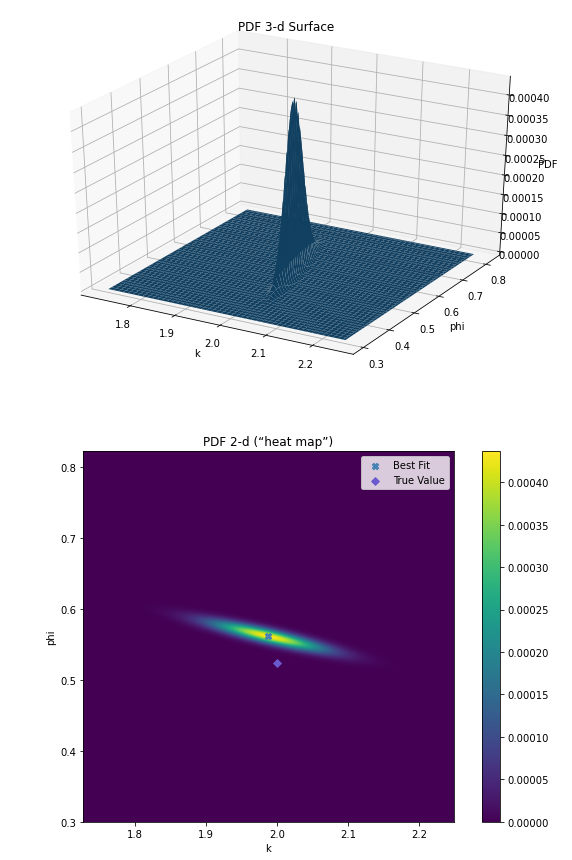

In [10]:
# Decide on grid search range
wid = phi_best - .3
k_start, k_end = k_best - wid, k_best + wid
p_start, p_end = phi_best - wid, phi_best + wid

xx, yy = np.mgrid[k_start : k_end : .001, p_start : p_end : .001]

# Create a grid of 2d coordinates 
xy = np.dstack((xx, yy))
gauss_2d = multivariate_normal(popt, pcov)

PDF = gauss_2d.pdf(xy)
PDF = PDF / PDF.sum()

print('check before plotting: ', xx.shape, yy.shape, PDF.shape)
fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(211, projection='3d') 
ax.plot_surface(xx, yy, PDF)
ax.set_xlabel('k')
ax.set_ylabel('phi')
ax.set_zlabel('PDF')
ax.set_title('PDF 3-d Surface')

axx = fig.add_subplot(212)
im = axx.imshow(PDF, extent = [k_start, k_end, p_start, p_end], origin='lower')
axx.scatter(k_best, phi_best, marker = 'X', facecolor = 'steelblue', s = 40, label='Best Fit')
axx.scatter(k, phi, marker='D', facecolor='slateblue', s = 30, label='True Value' )
axx.set_xlabel('k')
axx.set_ylabel('phi')
axx.set_title('PDF 2-d (“heat map”)')
axx.legend()
fig.colorbar(im)
plt.show()

### CDF for k and φ, in 2-d (“heat maps”) and 3-d

In [11]:
def compute_cdf(P): # Calculating CDF for 2 variables
    '''
    Input: probability distribution (PDF)
    Returns: CDF
    Adopted from: 
        https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/
    '''
    shape_orig = P.shape
    P = P.ravel()   
    i_sort = np.argsort(P)[::-1]
    i_unsort = np.argsort(i_sort)
    P_cumsum = P[i_sort].cumsum()
    P_cumsum /= P_cumsum[-1]
    return P_cumsum[i_unsort].reshape(shape_orig)

In [12]:
# Set Contour Levels
sig1, sig2, sig3 = .683, .954, .997
contour_levels = [sig1, sig2, sig3]

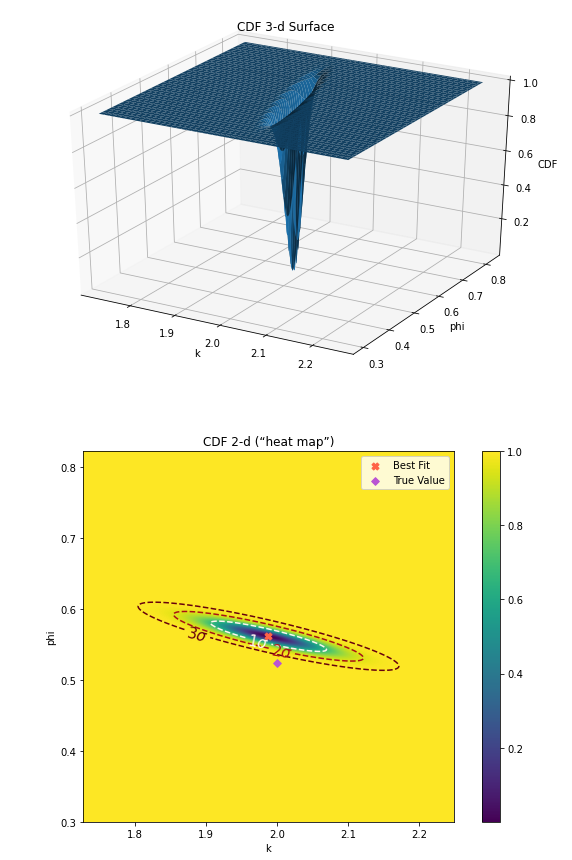

In [13]:
# calculate CDF
CDF_ex = compute_cdf(PDF)
fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(xx, yy, CDF_ex)
ax.set_xlabel('k')
ax.set_ylabel('phi')
ax.set_zlabel('CDF')
ax.set_title('CDF 3-d Surface')

axx = fig.add_subplot(212)
axx.set_xlabel('k')
axx.set_ylabel('phi')
axx.set_title('CDF 2-d (“heat map”)')
axx.scatter(k_best, phi_best, marker='X', facecolor='tomato', s = 50, label='Best Fit')
axx.scatter(k, phi, marker='D', facecolor='mediumorchid', s = 30, label='True Value' )
axx.legend()

CS = plt.contour(CDF_ex, linestyles=['--','--','--'], levels=contour_levels, extent=[k_start, k_end, p_start, p_end], cmap='Reds')
im = axx.imshow(CDF_ex, extent = [k_start, k_end, p_start, p_end], origin='lower')
fig.colorbar(im)
fmtdict = {sig1:r'$1\sigma$', sig2:r'$2\sigma$', sig3:r'$3\sigma$'}
plt.clabel(CS, fmt=fmtdict, inline=True, fontsize=15)

plt.show()

### Part II

In [14]:
def y_model(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):
    '''
    This function is the model c0 + c1x + c2x2 + c3x3 + c4x4 + c5x5 + c6x6 + c7x7 + c8x8
    '''
    return (c0 + c1 * x + c2 * (x ** 2) + c3 * (x ** 3) + c4 * (x ** 4) + \
            c5 * (x ** 5) + c6 * (x ** 6) + c7 * (x ** 7) + c8 * (x ** 8))

In [15]:
# Determine best fit
popt_poly, pcov_poly = curve_fit(y_model, x_arr, y, maxfev=10000)
y_best_poly = popt_poly[0] + popt_poly[1] * x_arr + popt_poly[2] * (x_arr ** 2) + popt_poly[3] * (x_arr ** 3) + \
popt_poly[4] * (x_arr ** 4) + popt_poly[5] *(x_arr ** 5) + popt_poly[6] * (x_arr ** 6) + \
popt_poly[7] * (x_arr **7 ) + popt_poly[8] * (x_arr ** 8)

chi2_poly = ((y - y_best_poly) **2 / var).sum()
print('The polynomial chi^2 is: {:.3f}'.format(chi2_poly))

# reduced chi2
n_poly = 9 # number of fitting parameters
DOF_poly = N - n_poly
chi2_nu_poly = chi2_poly / DOF_poly
print('The reduced polynomial chi^2 is: {:.3f}'.format(chi2_nu_poly))

The polynomial chi^2 is: 111.523
The reduced polynomial chi^2 is: 1.212


Best-fit polynomial coefficients:
[0.795 -0.858 6.921 -11.837 7.670 -2.406 0.392 -0.032 0.001]
chi2, chi2_nu, DOF are: 111.523, 1.212, 92.000, respectively.


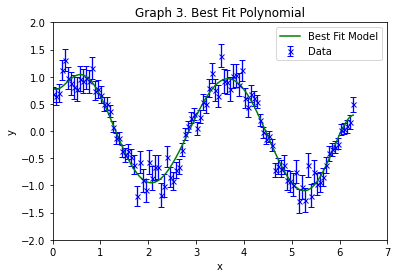

In [16]:
# Display result polynomial
print('Best-fit polynomial coefficients:')
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print(popt_poly)
print('chi2, chi2_nu, DOF are: {:.3f}, {:.3f}, {:.3f}, respectively.'.format(chi2_poly, chi2_nu_poly, DOF_poly))

# Plot best fit polynomial with errorbar
plt.errorbar(x_arr, y, yerr=total_err, fmt='xb', ms=5, capsize=3, elinewidth=1.3, label= 'Data')
plt.plot(x_arr, y_best_poly, 'g', label='Best Fit Model')
plt.title('Graph 3. Best Fit Polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.show()

### The best-fit parameters, the covariance matrix, and the uncertainties

In [17]:
print("Best-fit coefficients:\n{}\n".format(popt_poly))
print("The covariance matrix:\n{}\n".format(pcov_poly))

c0_cov = np.sqrt(pcov_poly[0, 0])
c1_cov = np.sqrt(pcov_poly[1, 1])
c2_cov = np.sqrt(pcov_poly[2, 2])
c3_cov = np.sqrt(pcov_poly[3, 3])
c4_cov = np.sqrt(pcov_poly[4, 4])
c5_cov = np.sqrt(pcov_poly[5, 5])
c6_cov = np.sqrt(pcov_poly[6, 6])
c7_cov = np.sqrt(pcov_poly[7, 7])
c8_cov = np.sqrt(pcov_poly[8, 8])

print("The best parameters are:")
print("c0 = {:.3f} +/ {:.3f}.".format(popt_poly[0], c0_cov))
print("c1 = {:.3f} +/ {:.3f}.".format(popt_poly[1], c1_cov))
print("c2 = {:.3f} +/ {:.3f}.".format(popt_poly[2], c2_cov))
print("c3 = {:.3f} +/ {:.3f}.".format(popt_poly[3], c3_cov))
print("c4 = {:.3f} +/ {:.3f}.".format(popt_poly[4], c4_cov))
print("c5 = {:.3f} +/ {:.3f}.".format(popt_poly[5], c5_cov))
print("c6 = {:.3f} +/ {:.3f}.".format(popt_poly[6], c6_cov))
print("c7 = {:.3f} +/ {:.3f}.".format(popt_poly[7], c7_cov))
print("c8 = {:.3f} +/ {:.3f}.".format(popt_poly[8], c8_cov))

Best-fit coefficients:
[0.795 -0.858 6.921 -11.837 7.670 -2.406 0.392 -0.032 0.001]

The covariance matrix:
[[0.020 -0.124 0.250 -0.237 0.122 -0.036 0.006 -0.001 0.000]
 [-0.124 1.160 -2.743 2.826 -1.531 0.469 -0.082 0.008 -0.000]
 [0.250 -2.743 6.992 -7.545 4.216 -1.320 0.234 -0.022 0.001]
 [-0.237 2.826 -7.545 8.395 -4.796 1.527 -0.274 0.026 -0.001]
 [0.122 -1.531 4.216 -4.796 2.785 -0.899 0.163 -0.016 0.001]
 [-0.036 0.469 -1.320 1.527 -0.899 0.293 -0.054 0.005 -0.000]
 [0.006 -0.082 0.234 -0.274 0.163 -0.054 0.010 -0.001 0.000]
 [-0.001 0.008 -0.022 0.026 -0.016 0.005 -0.001 0.000 -0.000]
 [0.000 -0.000 0.001 -0.001 0.001 -0.000 0.000 -0.000 0.000]]

The best parameters are:
c0 = 0.795 +/ 0.140.
c1 = -0.858 +/ 1.077.
c2 = 6.921 +/ 2.644.
c3 = -11.837 +/ 2.897.
c4 = 7.670 +/ 1.669.
c5 = -2.406 +/ 0.541.
c6 = 0.392 +/ 0.099.
c7 = -0.032 +/ 0.010.
c8 = 0.001 +/ 0.000.


### Q: How confident are you that the constant term is not zero?
### A: 99.73% confidence (3-sigma). The number varies above or below 0 for 5-sigma depending on the result of random numbers, and the percentage of confidence for 4-sigma is unknown.

In [18]:
print("1 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(popt_poly[0], c0_cov, popt_poly[0] + c0_cov,\
                                                                                popt_poly[0], c0_cov, popt_poly[0] - c0_cov))
print("2 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(popt_poly[0], 2 * c0_cov, popt_poly[0] + 2 * c0_cov,\
                                                                                popt_poly[0], 2 * c0_cov, popt_poly[0] - 2 * c0_cov))
print("3 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(popt_poly[0], 3 * c0_cov, popt_poly[0] + 3 * c0_cov,\
                                                                                popt_poly[0], 3 * c0_cov, popt_poly[0] - 3 * c0_cov))
print("4 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(popt_poly[0], 4 * c0_cov, popt_poly[0] + 3 * c0_cov,\
                                                                                popt_poly[0], 4 * c0_cov, popt_poly[0] - 4 * c0_cov))
print("5 sigma: {:.3f} + {:.3f} = {:.3f}, {:.3f} - {:.3f} = {:.3f}".format(popt_poly[0], 5 * c0_cov, popt_poly[0] + 5 * phi_cov,\
                                                                                popt_poly[0], 5 * c0_cov, popt_poly[0] - 5 * c0_cov))

1 sigma: 0.795 + 0.140 = 0.935, 0.795 - 0.140 = 0.655
2 sigma: 0.795 + 0.281 = 1.076, 0.795 - 0.281 = 0.515
3 sigma: 0.795 + 0.421 = 1.216, 0.795 - 0.421 = 0.374
4 sigma: 0.795 + 0.561 = 1.216, 0.795 - 0.561 = 0.234
5 sigma: 0.795 + 0.701 = 1.064, 0.795 - 0.701 = 0.094


In [19]:
# C0 to c8 Covariance Relations
print('C0 and C1 relation:', pcov_poly[0,1])
print('C0 and C2 relation:', pcov_poly[0,2])
print('C0 and C3 relation:', pcov_poly[0,3])
print('C0 and C4 relation:', pcov_poly[0,4])
print('C0 and C5 relation:', pcov_poly[0,5])
print('C0 and C6 relation:', pcov_poly[0,6])
print('C0 and C7 relation:', pcov_poly[0,7])
print('C0 and C8 relation:', pcov_poly[0,8])
print()
print('C1 and C2 relation:', pcov_poly[1,2])
print('C1 and C3 relation:', pcov_poly[1,3])
print('C1 and C4 relation:', pcov_poly[1,4])
print('C1 and C5 relation:', pcov_poly[1,5])
print('C1 and C6 relation:', pcov_poly[1,6])
print('C1 and C7 relation:', pcov_poly[1,7])
print('C1 and C8 relation:', pcov_poly[1,8])
print()
print('C2 and C3 relation:', pcov_poly[2,3])
print('C2 and C4 relation:', pcov_poly[2,4])
print('C2 and C5 relation:', pcov_poly[2,5])
print('C2 and C6 relation:', pcov_poly[2,6])
print('C2 and C7 relation:', pcov_poly[2,7])
print('C2 and C8 relation:', pcov_poly[2,8])
print()
print('C3 and C4 relation:', pcov_poly[3,4])
print('C3 and C5 relation:', pcov_poly[3,5])
print('C3 and C6 relation:', pcov_poly[3,6])
print('C3 and C7 relation:', pcov_poly[3,7])
print('C3 and C8 relation:', pcov_poly[3,8])
print()
print('C4 and C5 relation:', pcov_poly[4,5])
print('C4 and C6 relation:', pcov_poly[4,6])
print('C4 and C7 relation:', pcov_poly[4,7])
print('C4 and C8 relation:', pcov_poly[4,8])
print()
print('C5 and C6 relation:', pcov_poly[5,6])
print('C5 and C7 relation:', pcov_poly[5,7])
print('C5 and C8 relation:', pcov_poly[5,8])
print()
print('C6 and C7 relation:', pcov_poly[6,7])
print('C6 and C8 relation:', pcov_poly[8,6])
print()
print('C7 and C8 relation:', pcov_poly[7,8])

C0 and C1 relation: -0.12360315825858523
C0 and C2 relation: 0.25024861951621946
C0 and C3 relation: -0.2372962410794181
C0 and C4 relation: 0.12198993893491082
C0 and C5 relation: -0.03603773711133738
C0 and C6 relation: 0.006112540336861845
C0 and C7 relation: -0.0005530608951438049
C0 and C8 relation: 2.0679462306539885e-05

C1 and C2 relation: -2.7427945163249463
C1 and C3 relation: 2.826370220001135
C1 and C4 relation: -1.5306249518610042
C1 and C5 relation: 0.46860163562953994
C1 and C6 relation: -0.08157657621452959
C1 and C7 relation: 0.007528675068120213
C1 and C8 relation: -0.00028592631551141955

C2 and C3 relation: -7.544756053028014
C2 and C4 relation: 4.215731130029928
C2 and C5 relation: -1.3202528524586912
C2 and C6 relation: 0.23382623994988017
C2 and C7 relation: -0.021873358931026956
C2 and C8 relation: 0.0008398142183260948

C3 and C4 relation: -4.795665526070335
C3 and C5 relation: 1.527188516411664
C3 and C6 relation: -0.2740442658780371
C3 and C7 relation: 0.0259

In [20]:
# C0 to C6 Covariance Relations
print('C0 and C1 relation:', pcov_poly[0,1])
print('C0 and C2 relation:', pcov_poly[0,2])
print('C0 and C3 relation:', pcov_poly[0,3])
print('C0 and C4 relation:', pcov_poly[0,4])
print('C0 and C5 relation:', pcov_poly[0,5])
print('C0 and C6 relation:', pcov_poly[0,6])
print()
print('C1 and C2 relation:', pcov_poly[1,2])
print('C1 and C3 relation:', pcov_poly[1,3])
print('C1 and C4 relation:', pcov_poly[1,4])
print('C1 and C5 relation:', pcov_poly[1,5])
print('C1 and C6 relation:', pcov_poly[1,6])
print()
print('C2 and C3 relation:', pcov_poly[2,3])
print('C2 and C4 relation:', pcov_poly[2,4])
print('C2 and C5 relation:', pcov_poly[2,5])
print('C2 and C6 relation:', pcov_poly[2,6])
print()
print('C3 and C4 relation:', pcov_poly[3,4])
print('C3 and C5 relation:', pcov_poly[3,5])
print('C3 and C6 relation:', pcov_poly[3,6])
print()
print('C4 and C5 relation:', pcov_poly[4,5])
print('C4 and C6 relation:', pcov_poly[4,6])
print()
print('C5 and C6 relation:', pcov_poly[5,6])
print()

C0 and C1 relation: -0.12360315825858523
C0 and C2 relation: 0.25024861951621946
C0 and C3 relation: -0.2372962410794181
C0 and C4 relation: 0.12198993893491082
C0 and C5 relation: -0.03603773711133738
C0 and C6 relation: 0.006112540336861845

C1 and C2 relation: -2.7427945163249463
C1 and C3 relation: 2.826370220001135
C1 and C4 relation: -1.5306249518610042
C1 and C5 relation: 0.46860163562953994
C1 and C6 relation: -0.08157657621452959

C2 and C3 relation: -7.544756053028014
C2 and C4 relation: 4.215731130029928
C2 and C5 relation: -1.3202528524586912
C2 and C6 relation: 0.23382623994988017

C3 and C4 relation: -4.795665526070335
C3 and C5 relation: 1.527188516411664
C3 and C6 relation: -0.2740442658780371

C4 and C5 relation: -0.898598699743638
C4 and C6 relation: 0.1629409723546925

C5 and C6 relation: -0.053573761512725505



### Covariance Correlations from C0 to C6:
### Most positively correlated, most negatively correlated (or anti-correlated), and least correlated.

In [21]:
print('Most positively correlated is the c2 and c4 relation on cov[2,4] --> {:.3f}'.format(pcov_poly[2,4]))
print('Most negatively correlated is the c2 and c3 relation on cov[2,3] --> {:.3f}'.format(pcov_poly[2,3]))
print('Least correlated is the c0 and c6 relation on cov[0,6] --> {:.3f}'.format(pcov_poly[0,6]))

Most positively correlated is the c2 and c4 relation on cov[2,4] --> 4.216
Most negatively correlated is the c2 and c3 relation on cov[2,3] --> -7.545
Least correlated is the c0 and c6 relation on cov[0,6] --> 0.006


In [22]:
# Covariances for most positive, most negative, and least correlated
pcov_c2c4 = np.array([[pcov_poly[2,2], pcov_poly[2,4]], [pcov_poly[4,2], pcov_poly[4,4]]])
pcov_c2c3 = np.array([[pcov_poly[2,2], pcov_poly[2,3]], [pcov_poly[3,2], pcov_poly[3,3]]])
pcov_c0c6 = np.array([[pcov_poly[0,0], pcov_poly[0,6]], [pcov_poly[6,0], pcov_poly[6,6]]])
print('pcov_c2c4:\n', pcov_c2c4)
print('pcov_c2c3:\n', pcov_c2c3)
print('pcov_c0c6:\n', pcov_c0c6)

# Best fits for most positive, most negative, and least correlated
popt_c2c4 = np.array([popt_poly[2], popt_poly[4]])
popt_c2c3 = np.array([popt_poly[2], popt_poly[3]]) 
popt_c0c6 = np.array([popt_poly[0], popt_poly[6]]) 
print('\npopt_c2c4:\n', popt_c2c4)
print('popt_c2c3:\n', popt_c2c3)
print('popt_c0c6:\n', popt_c0c6)

pcov_c2c4:
 [[6.992 4.216]
 [4.216 2.785]]
pcov_c2c3:
 [[6.992 -7.545]
 [-7.545 8.395]]
pcov_c0c6:
 [[0.020 0.006]
 [0.006 0.010]]

popt_c2c4:
 [6.921 7.670]
popt_c2c3:
 [6.921 -11.837]
popt_c0c6:
 [0.795 0.392]


### Most Positively Correlated PDF and CDF in 2-d

In [23]:
# Decide on grid search range
c2c4_wid = 10

c2_start, c2_end = popt_c2c4[0] - c2c4_wid, popt_c2c4[0] + c2c4_wid
c4_start, c4_end = popt_c2c4[1] - c2c4_wid, popt_c2c4[1] + c2c4_wid

c2_arr = np.linspace(c2_start, c2_end, 1000)
c4_arr = np.linspace(c4_start, c4_end, 1000)
extent_c2c4 = [c2_arr[0], c2_arr[-1], c4_arr[0], c4_arr[-1]]

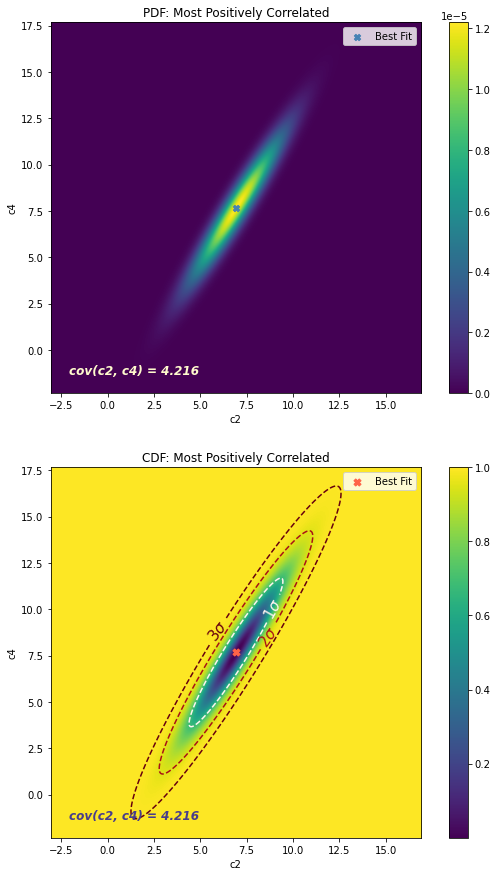

In [24]:
xx, yy = np.mgrid[c2_start : c2_end : .01, c4_start : c4_end : .01]
xy = np.dstack((xx, yy))
gauss_2d = multivariate_normal(popt_c2c4, pcov_c2c4)

# Calculate PDF & CDF
PDF_c2c4 = gauss_2d.pdf(xy)
PDF_c2c4 /= PDF_c2c4.sum()
CDF_c2c4 = compute_cdf(PDF_c2c4)

# PDF c2c4: Most Positively Correlated
fig = plt.figure(figsize=(10, 15))
ax_c2c4_PDF = fig.add_subplot(211)
im_ax = ax_c2c4_PDF.imshow(PDF_c2c4, extent=extent_c2c4, origin='lower')
fig.colorbar(im_ax)
ax_c2c4_PDF.set_xlabel('c2')
ax_c2c4_PDF.set_ylabel('c4')
ax_c2c4_PDF.set_title('PDF: Most Positively Correlated')
ax_c2c4_PDF.scatter(popt_c2c4[0], popt_c2c4[1], marker = 'X', facecolor = 'steelblue', s = 40, label='Best Fit')
c2c4_text = 'cov(c2, c4) = {:.3f}'.format(pcov_poly[2,4])
ax_c2c4_PDF.text(popt_c2c4[0] - (c2c4_wid - 1), popt_c2c4[1] - (c2c4_wid - 1), c2c4_text, color='lemonchiffon', fontsize='large', fontweight='demibold', fontstyle='italic')
ax_c2c4_PDF.legend()

# CDF c2c4: Most Positively Correlated
ax_c2c4_CDF = fig.add_subplot(212)
CS = plt.contour(CDF_c2c4, linestyles=['--','--','--'], levels=contour_levels, extent=extent_c2c4, cmap='Reds')
im = ax_c2c4_CDF.imshow(CDF_c2c4, extent=extent_c2c4, origin='lower')
fig.colorbar(im)
fmtdict = {sig1:r'$1\sigma$', sig2:r'$2\sigma$', sig3:r'$3\sigma$'}
plt.clabel(CS, fmt=fmtdict, inline=True, fontsize=15)
ax_c2c4_CDF.scatter(popt_c2c4[0], popt_c2c4[1], marker = 'X', facecolor = 'tomato', s = 50, label='Best Fit')
ax_c2c4_CDF.set_xlabel('c2')
ax_c2c4_CDF.set_ylabel('c4')
ax_c2c4_CDF.set_title('CDF: Most Positively Correlated')
ax_c2c4_CDF.text(popt_c2c4[0] - (c2c4_wid - 1), popt_c2c4[1] - (c2c4_wid - 1), c2c4_text, color='darkslateblue', fontsize='large', fontweight='demibold', fontstyle='italic')
ax_c2c4_CDF.legend()
plt.show()

In [32]:
# Decide on grid search range
c2c4_wid = 10

c2_start, c2_end = popt_c2c4[0] - c2c4_wid, popt_c2c4[0] + c2c4_wid
c4_start, c4_end = popt_c2c4[1] - c2c4_wid, popt_c2c4[1] + c2c4_wid

c2_arr = np.linspace(c2_start, c2_end, 1000)
c4_arr = np.linspace(c4_start, c4_end, 1000)
extent_c2c4 = [c2_arr[0], c2_arr[-1], c4_arr[0], c4_arr[-1]]

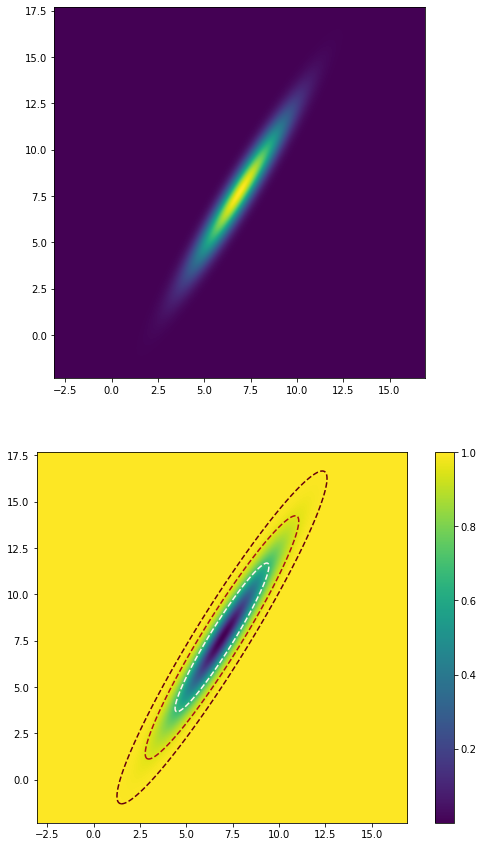

In [31]:
xx, yy = np.mgrid[c2_start : c2_end : .01, c4_start : c4_end : .01]
xy = np.dstack((xx, yy))
gauss_2d = multivariate_normal(popt_c2c4, pcov_c2c4)

# Calculate PDF & CDF
PDF_c2c4 = gauss_2d.pdf(xy)
PDF_c2c4 /= PDF_c2c4.sum()
CDF_c2c4 = compute_cdf(PDF_c2c4)

# PDF c2c4: Most Positively Correlated
fig = plt.figure(figsize=(10, 15))
ax_c2c4_PDF = fig.add_subplot(211)
im_ax = ax_c2c4_PDF.imshow(PDF_c2c4, extent=extent_c2c4, origin='lower')

# CDF c2c4: Most Positively Correlated
ax_c2c4_CDF = fig.add_subplot(212)
CS = plt.contour(CDF_c2c4, linestyles=['--','--','--'], levels=contour_levels, extent=extent_c2c4, cmap='Reds')
im = ax_c2c4_CDF.imshow(CDF_c2c4, extent=extent_c2c4, origin='lower')
fig.colorbar(im)
plt.show()


### Most Negatively Correlated (or anti-correlated) PDF and CDF in 2-d

In [26]:
# Decide on grid search range
c2c3_wid = 10.

c2_start, c2_end = popt_c2c3[0] - c2c3_wid, popt_c2c3[0] + c2c3_wid
c3_start, c3_end = popt_c2c3[1] - c2c3_wid, popt_c2c3[1] + c2c3_wid

c2_arr = np.linspace(c2_start, c2_end, 1000)
c3_arr = np.linspace(c3_start, c3_end, 1000)
extent_c2c3 = [c2_arr[0], c2_arr[-1], c3_arr[0], c3_arr[-1]]

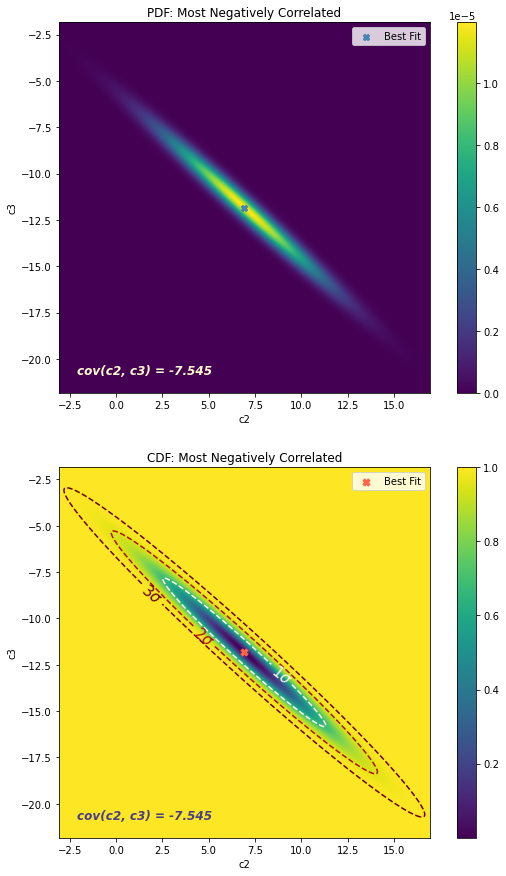

In [27]:
xx, yy = np.mgrid[c2_start : c2_end : .01, c3_start : c3_end : .01]
xy = np.dstack((xx, yy))
gauss_2d = multivariate_normal(popt_c2c3, pcov_c2c3)

# Calculate PDF & CDF
PDF_c2c3 = gauss_2d.pdf(xy)
PDF_c2c3 = PDF_c2c3 / PDF_c2c3.sum()
CDF_c2c3 = compute_cdf(PDF_c2c3)

# PDF c2c3: Most Negatively Correlated
fig = plt.figure(figsize=(10, 15))
ax_c2c3_PDF = fig.add_subplot(211)
im_ax = ax_c2c3_PDF.imshow(PDF_c2c3, extent=extent_c2c3, origin='lower')
fig.colorbar(im_ax)
ax_c2c3_PDF.set_xlabel('c2')
ax_c2c3_PDF.set_ylabel('c3')
ax_c2c3_PDF.set_title('PDF: Most Negatively Correlated')
ax_c2c3_PDF.scatter(popt_c2c3[0], popt_c2c3[1], marker = 'X', facecolor = 'steelblue', s = 40, label='Best Fit')
c2c3_text = 'cov(c2, c3) = {:.3F}'.format(pcov_poly[2,3])
ax_c2c3_PDF.text(popt_c2c3[0] - (c2c3_wid - 1), popt_c2c3[1] - (c2c3_wid - 1), c2c3_text, color='lemonchiffon', fontsize='large', fontweight='demibold', fontstyle='italic')
ax_c2c3_PDF.legend()

# CDF c2c3: Most Negatively Correlated
ax_c2c3_CDF = fig.add_subplot(212)
CS = plt.contour(CDF_c2c3, linestyles=['--','--','--'], levels=contour_levels, extent=extent_c2c3, cmap='Reds')
im = ax_c2c3_CDF.imshow(CDF_c2c3, extent=extent_c2c3, origin='lower')
fig.colorbar(im)
fmtdict = {sig1:r'$1\sigma$', sig2:r'$2\sigma$', sig3:r'$3\sigma$'}
plt.clabel(CS, fmt=fmtdict, inline=True, fontsize=15)
ax_c2c3_CDF.scatter(popt_c2c3[0], popt_c2c3[1], marker = 'X', facecolor = 'tomato', s = 50, label='Best Fit')
ax_c2c3_CDF.set_xlabel('c2')
ax_c2c3_CDF.set_ylabel('c3')
ax_c2c3_CDF.set_title('CDF: Most Negatively Correlated')
ax_c2c3_CDF.text(popt_c2c3[0] - (c2c3_wid - 1), popt_c2c3[1] - (c2c3_wid - 1), c2c3_text, color='darkslateblue', fontsize='large', fontweight='demibold', fontstyle='italic')
ax_c2c3_CDF.legend()
plt.show()

### Least Correlated PDF and CDF in 2-d

In [28]:
# Decide on grid search range
c0c6_wid = .5

c0_start, c0_end = popt_c0c6[0] - c0c6_wid, popt_c0c6[0] + c0c6_wid
c6_start, c6_end = popt_c0c6[1] - c0c6_wid, popt_c0c6[1] + c0c6_wid

c0_arr = np.linspace(c0_start, c0_end, 1000)
c6_arr = np.linspace(c6_start, c6_end, 1000)
extent_c0c6 = [c0_arr[0], c0_arr[-1], c6_arr[0], c6_arr[-1]]

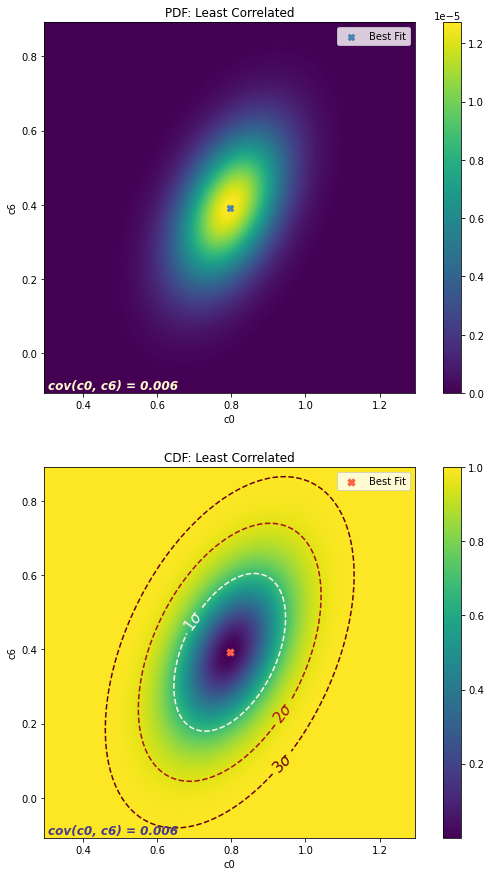

In [29]:
xx, yy = np.mgrid[c0_start : c0_end : .001, c6_start : c6_end : .001]
xy = np.dstack((xx, yy))
gauss_2d = multivariate_normal(popt_c0c6, pcov_c0c6)

# Calculate PDF & CDF
PDF_c0c6 = gauss_2d.pdf(xy)
PDF_c0c6 = PDF_c0c6 / PDF_c0c6.sum()
CDF_c0c6 = compute_cdf(PDF_c0c6)

# PDF c0c6: Least Correlated
fig = plt.figure(figsize=(10, 15))
ax_c0c6_PDF = fig.add_subplot(211)
im_ax = ax_c0c6_PDF.imshow(PDF_c0c6, extent=extent_c0c6, origin='lower')
fig.colorbar(im_ax)
ax_c0c6_PDF.set_xlabel('c0')
ax_c0c6_PDF.set_ylabel('c6')
ax_c0c6_PDF.set_title('PDF: Least Correlated')
ax_c0c6_PDF.scatter(popt_c0c6[0], popt_c0c6[1], marker = 'X', facecolor = 'steelblue', s = 40, label='Best Fit')
c0c6_text = 'cov(c0, c6) = {:.3F}'.format(pcov_poly[0,6])
ax_c0c6_PDF.text(popt_c0c6[0] + (c0c6_wid - .99), popt_c0c6[1] + (c0c6_wid - .99), c0c6_text, color='lemonchiffon', fontsize='large', fontweight='demibold', fontstyle='italic')
ax_c0c6_PDF.legend()

# CDF c0c6: Least Correlated
ax_c0c6_CDF = fig.add_subplot(212)
CS = plt.contour(CDF_c0c6, linestyles=['--','--','--'], levels=contour_levels, extent=extent_c0c6, cmap='Reds')
im = ax_c0c6_CDF.imshow(CDF_c0c6, extent=extent_c0c6, origin='lower')
fig.colorbar(im)
fmtdict = {sig1:r'$1\sigma$', sig2:r'$2\sigma$', sig3:r'$3\sigma$'}
plt.clabel(CS, fmt=fmtdict, inline=True, fontsize=15)
ax_c0c6_CDF.scatter(popt_c0c6[0], popt_c0c6[1], marker = 'X', facecolor = 'tomato', s = 50, label='Best Fit')
ax_c0c6_CDF.set_xlabel('c0')
ax_c0c6_CDF.set_ylabel('c6')
ax_c0c6_CDF.set_title('CDF: Least Correlated')
ax_c0c6_CDF.text(popt_c0c6[0] + (c0c6_wid - .99), popt_c0c6[1] + (c0c6_wid - .99), c0c6_text, color='darkslateblue', fontsize='large', fontweight='demibold', fontstyle='italic')
ax_c0c6_CDF.legend()
plt.show()